## Importar librerias

In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt # para generar graficos
from  sklearn.model_selection import train_test_split # repartir train y test 
from sklearn.tree import DecisionTreeClassifier # para arboles de desiciones
from sklearn.datasets import load_iris

## Cargar datos

In [15]:
db_iris = load_iris()

## conociendo los datos

In [13]:
print(db_irirs.DESCR) # descripcion
print(db_irirs.target) # target

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

## Convertir dataset en dataFrame 

In [18]:
df_iris = pd.DataFrame(db_iris.data,columns=db_iris.feature_names)
df_iris['target']=db_iris.target
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Separar los datos

In [21]:
x_train ,x_test,y_train ,y_test = train_test_split(df_iris[db_iris.feature_names],df_iris['target'],random_state = 2) 

## Arbol de desiciones

In [22]:
arbol = DecisionTreeClassifier(max_depth=2, random_state=0)

## Entrenar Modelo

In [23]:
arbol.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

## Usar datos de X_test

In [41]:
#print(x_test.iloc[0:10])
print(y_test.iloc[0:10])
arbol.predict(x_test.iloc[0:10].values)

6      0
3      0
113    2
12     0
24     0
129    2
25     0
108    2
128    2
45     0
Name: target, dtype: int64


array([0, 0, 2, 0, 0, 1, 0, 2, 2, 0])

## Calcular la presicion ACCURACY

In [47]:
accuracy = arbol.score(x_test,y_test)
print('la presicion es de '+str(accuracy*100))

la presicion es de 94.73684210526315


## Grafico Arbol 

In [49]:
class_name_list=['setosa','versicolor','virginic']
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
dot_data = export_graphviz(arbol,feature_names = db_iris.feature_names,class_names = class_name_list)
graph = graph_from_dot_data(dot_data)
graph.write_png('arbol_iris.png')

True

## Caracteristicas relevantes

In [56]:
df_importancia = pd.DataFrame({'caracteristicas':x_train.columns,'importancia':arbol.feature_importances_})
df_importancia = df_importancia.sort_values('importancia',ascending=False)
df_importancia.head()

,caracteristicas,importancia
3,petal width (cm),1.0
0,sepal length (cm),0.0
1,sepal width (cm),0.0
2,petal length (cm),0.0


## Probar arbol con diferentes profundidades

In [57]:
depth_list = list(range(1,6))
accuracy_list =[]
for depth in depth_list:
  arbol = DecisionTreeClassifier(max_depth=depth,random_state=0)
  arbol.fit(x_train,y_train)
  score = arbol.score(x_test,y_test)
  accuracy_list.append(score)

## Grafico de resultados


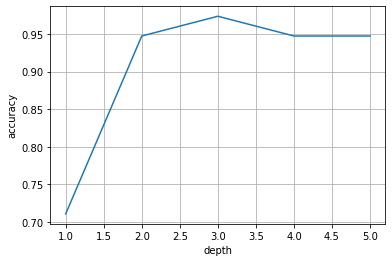

In [58]:
plt.plot(depth_list,accuracy_list)
plt.ylabel('accuracy')
plt.xlabel('depth')
plt.grid(True)
plt.show()